In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
DATA_DIR = "data1"

In [4]:
# csv_files = glob.glob(f"{DATA_DIR}\\evolution-*")
# df_list = [pd.read_csv(file) for file in csv_files]
# df = pd.concat(df_list, ignore_index=True)

In [24]:
df.to_csv("evolution1.csv", index=False)

In [25]:
df = pd.read_csv("evolution1.csv")

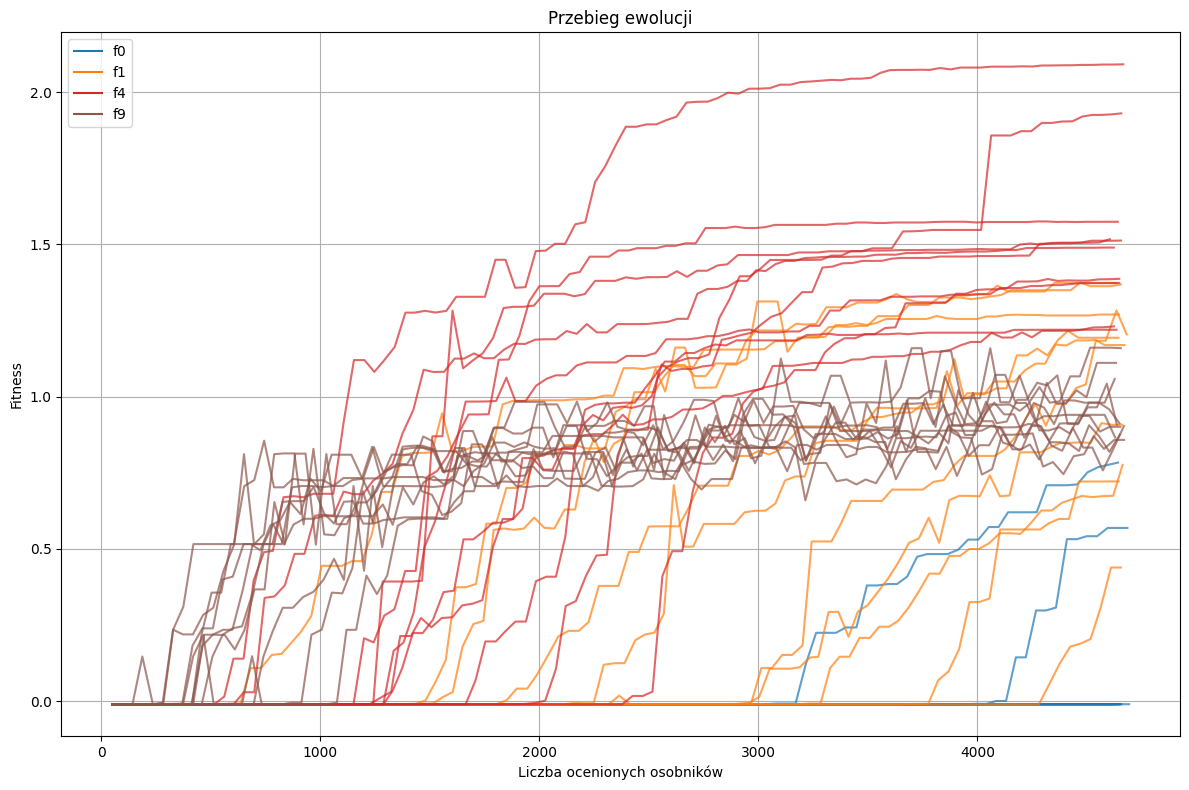

In [26]:
cmap = plt.cm.get_cmap('tab10', 7)
colors = [cmap(i) for i in range(7)]
plt.figure(figsize=(12, 8))
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    for run_index, run_df in representation_runs_df.groupby('run'):
        plt.plot(run_df['nevals'].cumsum(), run_df['max'], alpha=0.7, color=colors[i])
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    plt.plot([], [], color=colors[i], label=f'{representation_value}')
plt.title('Przebieg ewolucji')
plt.xlabel('Liczba ocenionych osobników')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

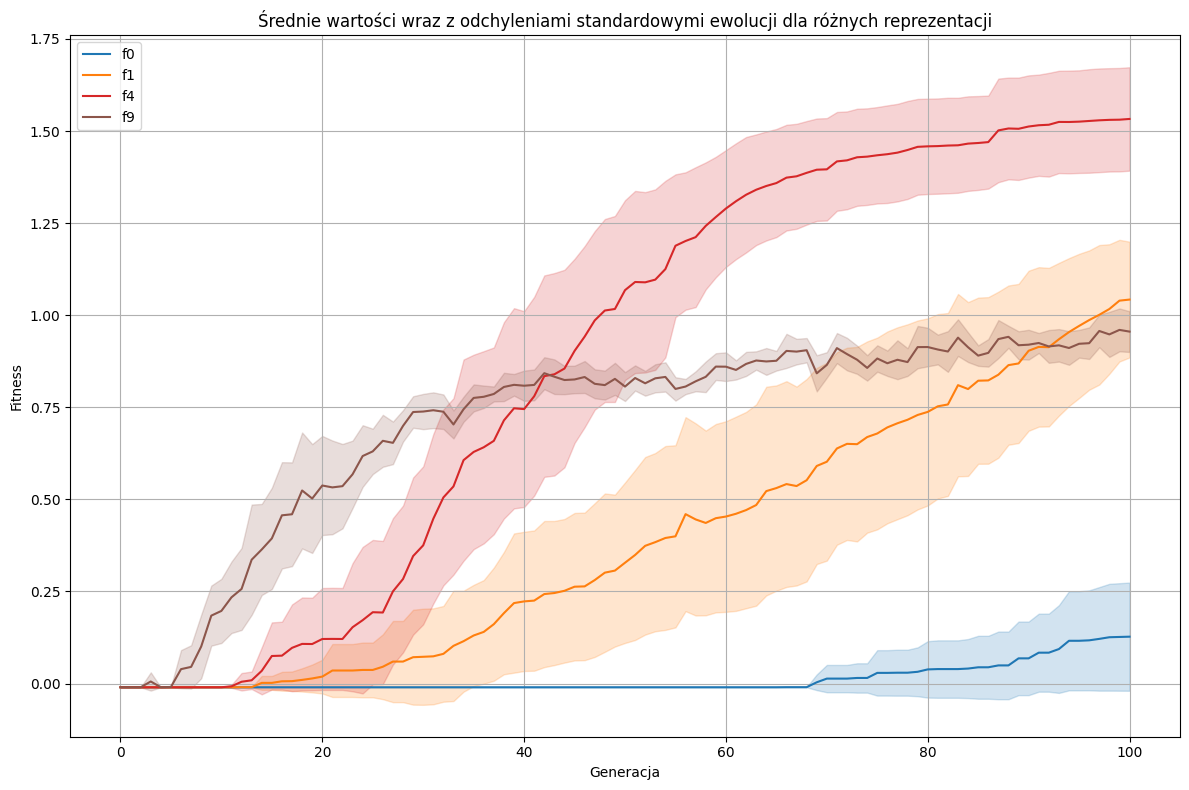

In [27]:
cmap = plt.cm.get_cmap('tab10', 7)
colors = [cmap(i) for i in range(7)]
plt.figure(figsize=(12, 8))
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    mean_values = representation_runs_df.groupby('gen')['max'].mean().values
    std_values = representation_runs_df.groupby('gen')['max'].std().values
    gen_values = representation_runs_df.groupby('gen')['max'].mean().index

    plt.plot(gen_values, mean_values, color=colors[i])
    plt.fill_between(gen_values, mean_values - std_values/2, mean_values + std_values/2, color=colors[i], alpha=0.2)
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    plt.plot([], [], color=colors[i], label=f'{representation_value}')
plt.title('Średnie wartości wraz z odchyleniami standardowymi ewolucji dla różnych reprezentacji')
plt.xlabel('Generacja')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

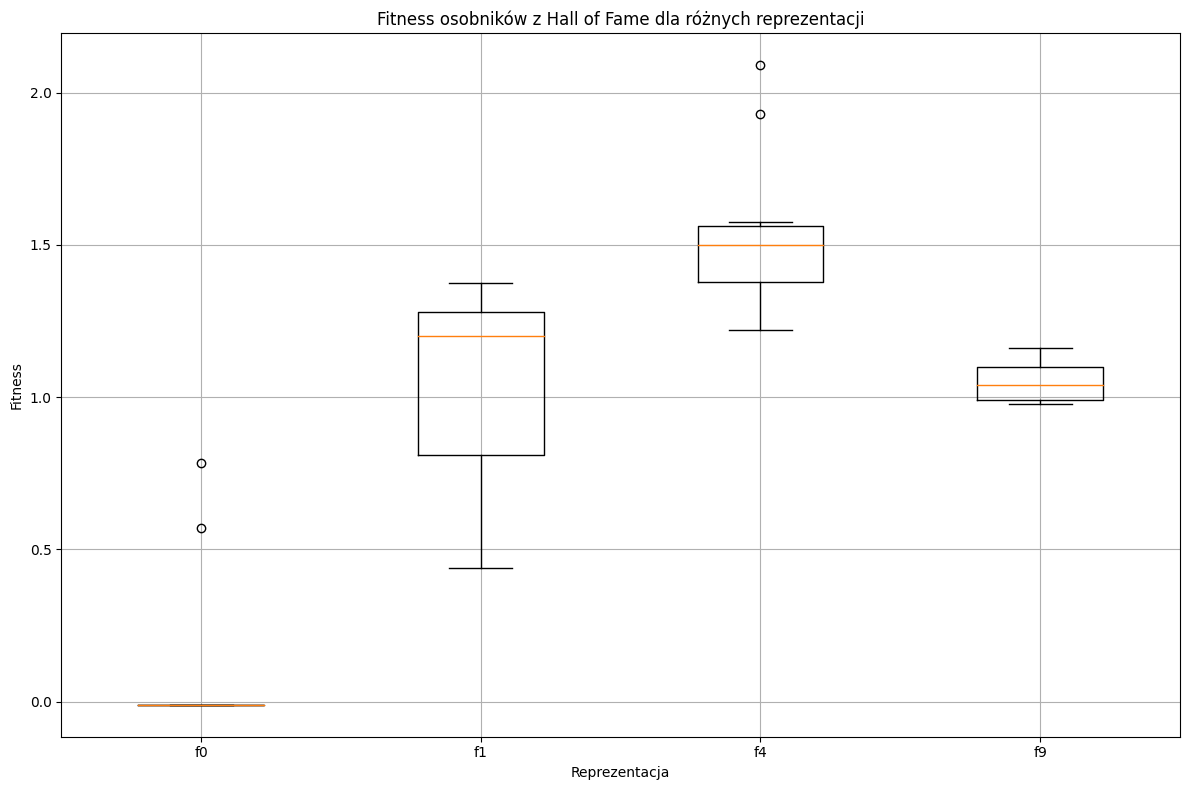

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create an empty list to store the data for each box plot
data = []

# Iterate over the grouped dataframe
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    # Gather the max values for each run
    max_values = representation_runs_df.groupby('run')['max'].max().values
    data.append(max_values)

# Create the box plots, with positions based on the index 'i'
plt.boxplot(data)

# Set x-axis labels for each box plot based on representation values
plt.xticks(range(1, len(df['representation'].unique()) + 1), [f'{x}' for x in df['representation'].unique()])
plt.title('Fitness osobników z Hall of Fame dla różnych reprezentacji')
# Add axis labels
plt.xlabel('Reprezentacja')
plt.ylabel('Fitness')

# Display grid and adjust layout
plt.grid(True)
plt.tight_layout()
    
# Show the plot
plt.show()
